# Handwritten digits classification using neural network

In [1]:
pip install tensorflow

In [2]:
pip install keras

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
#load the handwritten dataset from keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
#sample images for x_train
len(X_train)

60000

In [7]:
#sample images for x_test
len(X_test)

10000

In [9]:

X_train.shape
#6000: Represents the number of samples (images) in the training set.
#28, 28: Represents the height of each image in pixels and width of each image in pixels.

(60000, 28, 28)

In [11]:
#X_train[0] refers to the first sample (or image) in the training dataset.
X_train[0]

#the image is range from 0 to 255
#0 is extreme black
#255 is extreme white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

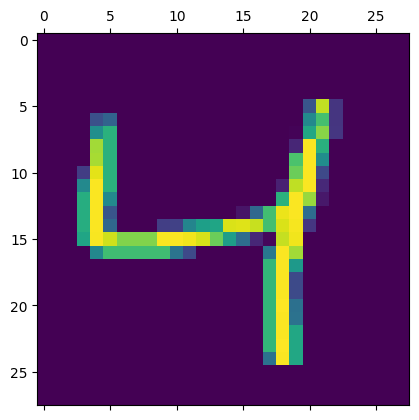

In [15]:

plt.matshow(X_train[2])

In [16]:
y_train[2]

4

In [17]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
X_train.shape


(60000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

In [35]:
#Pixel values in images typically range from 0 to 255 (for 8-bit grayscale images). By dividing by 255, you convert the pixel values to a range of 0 to 1. This helps stabilize and speed up the training of neural networks.
X_train = X_train /255
X_test = X_test / 255

In [42]:
X_train[0]

#it converts pixel values to range of 0 to 1

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [36]:
#reshapes the training dataset X_train from a 2D array of shape (6000, 28, 28) to a 1D array of shape (6000, 784).
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [37]:
X_train_flattened.shape

(60000, 784)

In [38]:
#reshapes the testing dataset X_test from a 2D array of shape (1000, 28, 28) to a 1D array of shape (1000, 784).
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [39]:
X_test_flattened.shape

(10000, 784)

## Very simple neural network with no hidden layers


In [40]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs =5)
#dense layer = each neuron is connected to every neuron in the previous layer. (it is also called as fully connected layer)
#10 : it is output shape
#activation = 'sigmoid': bcz for binary classification
# loass = 'sparse_categorical_crossentropy' : computes the crossentropy loaa between label and predictions
# epoch = 5 :The model will be trained for 5 iterations over the whole dataset.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4354 - loss: 2.2447
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6932 - loss: 2.0267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7363 - loss: 1.8356
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7556 - loss: 1.6640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7712 - loss: 1.5205


In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7724 - loss: 1.4580


[1.4043736457824707, 0.802299976348877]

In [44]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.31704137, 0.39792508, 0.3557596 , ..., 0.8062907 , 0.36886153,
        0.58312726],
       [0.38868883, 0.41011706, 0.6169605 , ..., 0.15385139, 0.3909734 ,
        0.17947698],
       [0.27770996, 0.82133293, 0.46277133, ..., 0.501922  , 0.41468537,
        0.43114355],
       ...,
       [0.20967908, 0.35551897, 0.32607275, ..., 0.5480411 , 0.51720184,
        0.60996   ],
       [0.35144305, 0.46313304, 0.34868097, ..., 0.42498347, 0.51290697,
        0.36783934],
       [0.6004879 , 0.13673404, 0.51131177, ..., 0.1274363 , 0.24180302,
        0.20790622]], dtype=float32)

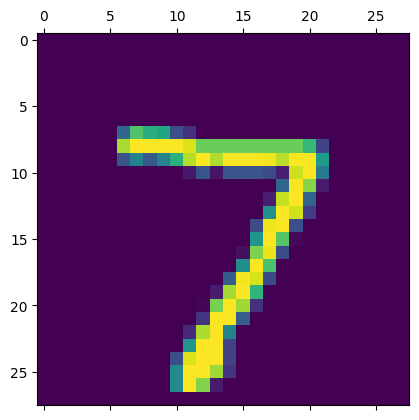

In [45]:
plt.matshow(X_test[0])

In [51]:
y_pred = model.predict(X_test_flattened)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.38868883, 0.41011706, 0.6169605 , 0.55084914, 0.18797512,
       0.44060117, 0.5382151 , 0.15385139, 0.3909734 , 0.17947698],
      dtype=float32)

In [52]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_pred[1])

2

In [56]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [57]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [61]:
cm= tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 927,    2,    7,   10,    0,    2,   26,    1,    5,    0],
       [   0, 1110,    9,    4,    0,    1,    4,    0,    7,    0],
       [  19,   82,  795,   34,   17,    0,   30,   22,   32,    1],
       [   6,   50,   27,  865,    1,    2,    5,   24,   20,   10],
       [   2,   49,    3,    0,  784,    0,   28,    9,    3,  104],
       [  38,  111,    5,  209,   35,  380,   27,   40,   20,   27],
       [  26,   47,    8,    0,   14,   10,  852,    0,    1,    0],
       [   2,   70,   14,    2,   10,    0,    2,  901,    6,   21],
       [  24,   98,   11,  102,   18,    4,   17,   25,  650,   25],
       [  23,   43,    5,   12,   72,    0,    1,   87,    7,  759]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

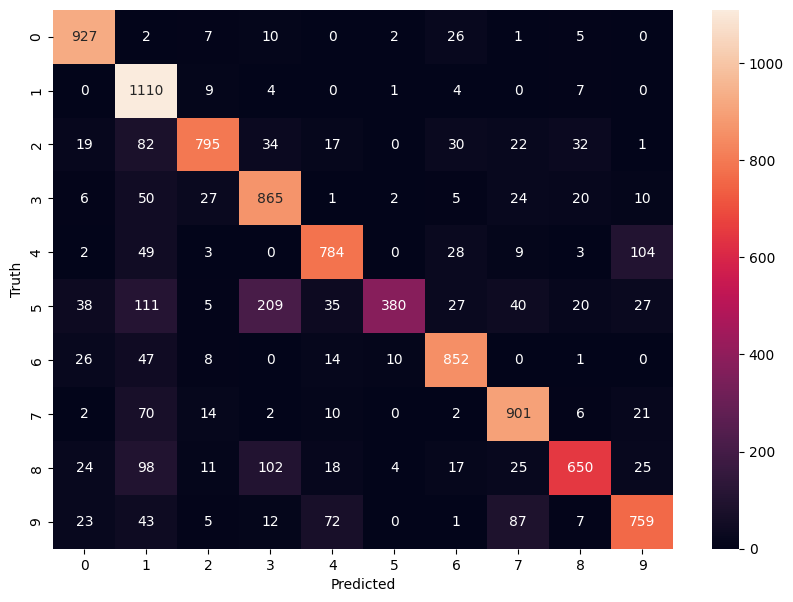

In [62]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#927 instances of class 0 were correctly predicted as class 0.
#1110 instances of class 1 were correctly predicted as class 1.
#865 instances of class 3 were correctly predicted as class 3. and so on.

## Using hidden layer

In [64]:
#Adding  hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs =5)

#First Dense Layer:Dense(100, input_shape=(784,), activation='relu'): This layer has 100 neurons, accepts input shapes of 784 (flattened 28x28 images), and uses the ReLU activation function. ReLU helps introduce non-linearity into the model.
#Second Dense Layer:Dense(10, activation='sigmoid'): This output layer has 10 neurons (one for each class, typically digits 0-9) and uses the sigmoid activation function. However, it's more common to use the Softmax activation function for multi-class classification tasks, as it outputs probabilities for each class that sum to 1.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5365 - loss: 1.7264
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8558 - loss: 0.5767
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8897 - loss: 0.4154
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9012 - loss: 0.3559
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9062 - loss: 0.3295


In [65]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8982 - loss: 0.3540


[0.3119164705276489, 0.9118000268936157]

In [67]:
y_pred = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

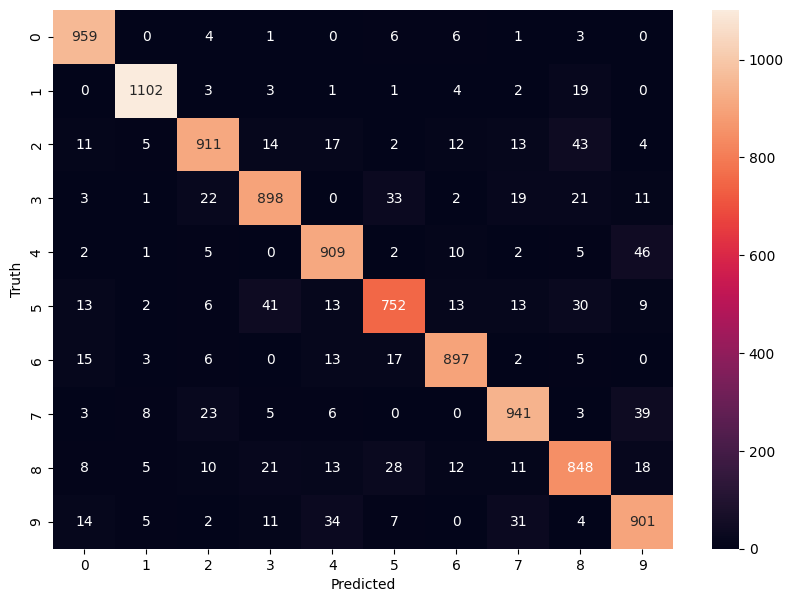

In [69]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using flatten layer so that we dont have to call .reshape on input dataset

In [71]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5551 - loss: 1.7179
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8609 - loss: 0.5639
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8895 - loss: 0.4120
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9001 - loss: 0.3597
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9059 - loss: 0.3306
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.3082
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9154 - loss: 0.2971
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9186 - loss: 0.2830
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9190 - loss: 0.2786
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9221 - loss: 0.2700


In [72]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9144 - loss: 0.2916


[0.25665342807769775, 0.925599992275238]